In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"D:\downloads\01_District_wise_crimes_committed_IPC_2001_2012 - Copy.csv")

In [3]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,78,104,1,30,1131,16,34,175,0,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,168,65,8,69,1543,7,24,154,0,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,156,209,9,38,2088,14,83,186,0,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,164,37,2,23,795,17,38,57,0,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,70,220,3,41,1244,12,58,247,0,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,7,10,0,0,3,3,0,0,1,0,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,7,10,0,0,3,3,0,0,1,0,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6,2,0,3,81,17,15,1,1,186,0,0,1,0,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7,17,5,13,577,109,75,5,20,632,0,2,5,0,3494


In [4]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [5]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,TOTAL_IPC_CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,78,104,1,30,1131,16,34,175,0,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,168,65,8,69,1543,7,24,154,0,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,156,209,9,38,2088,14,83,186,0,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,164,37,2,23,795,17,38,57,0,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,70,220,3,41,1244,12,58,247,0,6507


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   STATE/UT                                     9017 non-null   object
 1   DISTRICT                                     9017 non-null   object
 2   YEAR                                         9017 non-null   int64 
 3   MURDER                                       9017 non-null   int64 
 4   ATTEMPT_TO_MURDER                            9017 non-null   int64 
 5   RAPE                                         9017 non-null   int64 
 6   KIDNAPPING_&_ABDUCTION                       9017 non-null   int64 
 7   DACOITY                                      9017 non-null   int64 
 8   ROBBERY                                      9017 non-null   int64 
 9   THEFT                                        9017 non-null   int64 
 10  RIOTS       

In [7]:
df.describe()

,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,TOTAL_IPC_CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,53.041366,79.152046,13.177110,55.066430,776.428968,171.881335,170.255517,5.926140,25.219918,747.893091,20.228901,27.515582,194.122435,0.197849,5310.115116
std,3.463623,327.27503,303.446020,190.741450,317.630964,56.778798,220.576876,2935.008640,685.061783,743.536365,25.985903,98.880282,3024.106467,96.970466,167.237522,831.986594,2.415039,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,8.000000,10.000000,1.000000,6.000000,88.000000,11.000000,13.000000,0.000000,2.000000,43.000000,1.000000,0.000000,11.000000,0.000000,853.000000
50%,2007.000000,38.00000,28.000000,20.000000,25.000000,3.000000,17.000000,217.000000,46.000000,37.000000,1.000000,8.000000,199.000000,5.000000,2.000000,47.000000,0.000000,2096.000000
75%,2010.000000,66.00000,56.000000,41.000000,56.000000,9.000000,37.000000,466.000000,125.000000,104.000000,4.000000,20.000000,529.000000,16.000000,13.000000,135.000000,0.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,3425.000000,8878.000000,1319.000000,6949.000000,53449.000000,11214.000000,19646.000000,599.000000,2830.000000,56768.000000,2322.000000,4970.000000,19865.000000,83.000000,220335.000000


In [8]:
df.isnull().sum()

STATE/UT                                       0
DISTRICT                                       0
YEAR                                           0
MURDER                                         0
ATTEMPT_TO_MURDER                              0
RAPE                                           0
KIDNAPPING_&_ABDUCTION                         0
DACOITY                                        0
ROBBERY                                        0
THEFT                                          0
RIOTS                                          0
CHEATING                                       0
COUNTERFIETING                                 0
ARSON                                          0
HURT/GREVIOUS_HURT                             0
DOWRY_DEATHS                                   0
INSULT_TO_MODESTY_OF_WOMEN                     0
CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES            0
IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES    0
TOTAL_IPC_CRIMES                               0
dtype: int64

# Treatment of Outlier -- Winsorizing Technique¶

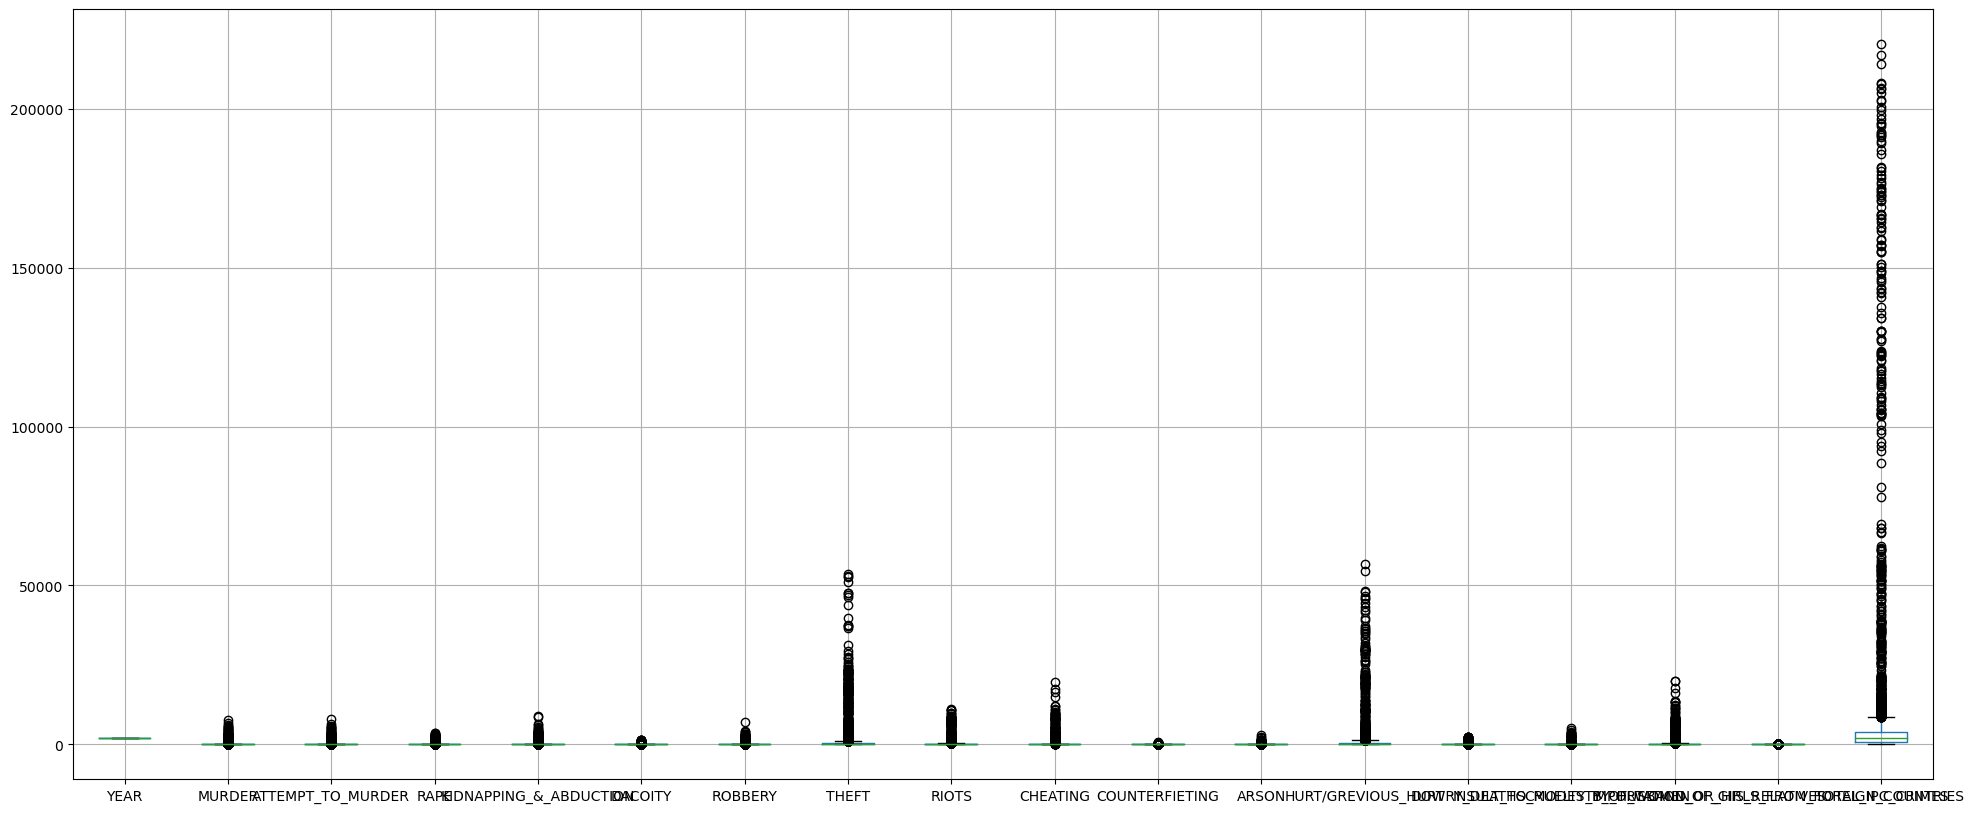

In [9]:
df.boxplot(figsize=(24,10))
plt.show()


In [10]:
for i in df:                  # i = column name
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT
        df[i].clip(lower=ll,upper=ul,inplace=True)

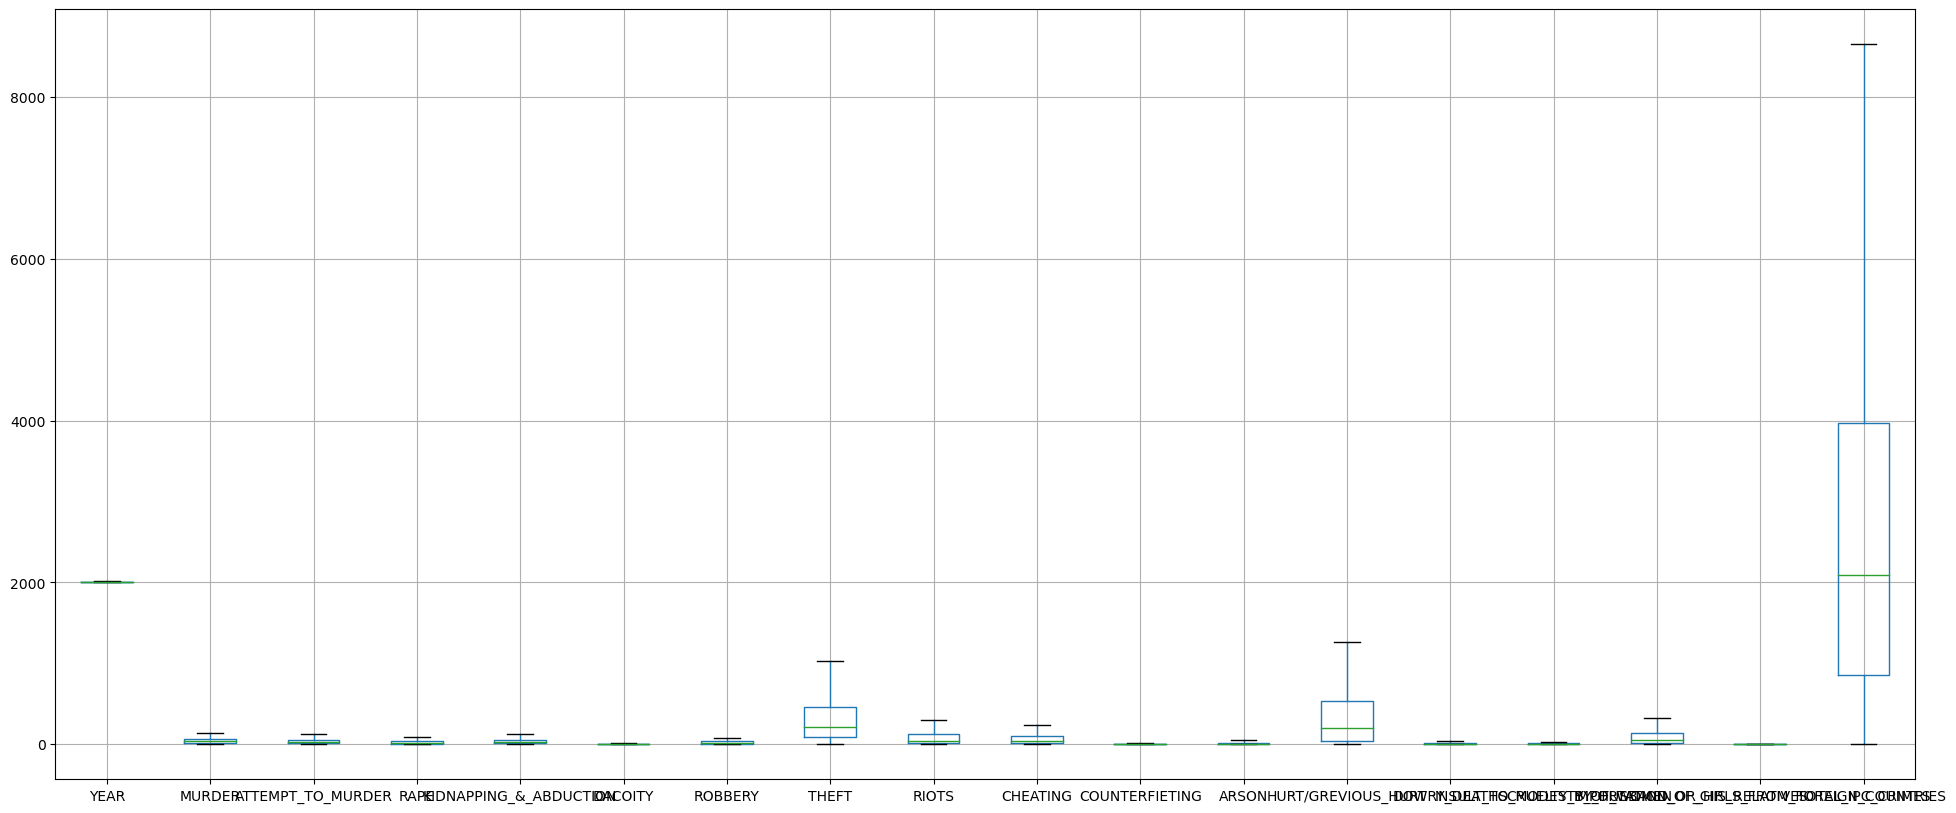

In [11]:
df.boxplot(figsize=(24,10))
plt.show()

# Data Partition

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['STATE/UT', 'DISTRICT', ]  # Specify the categorical columns

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [13]:
# Split data into features (X) and target variable (y)
X = df.drop(columns=['TOTAL_IPC_CRIMES'])  # Specify the target column
y = df['TOTAL_IPC_CRIMES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,TOTAL_IPC_CRIMES
8677,23,9,2012,12,13,42.0,2,1,2.0,288,0,28.0,4,2,51,0.0,0.0,8,0,905.0
111,4,694,2001,51,5,23.0,34,21,15.0,132,218,41.0,7,7,29,13.0,0.0,21,0,1797.0
5876,1,278,2009,138,125,40.0,79,4,44.0,1033,71,240.5,10,47,1258,26.0,32.5,321,0,8650.5
6338,25,54,2009,26,50,46.0,62,11,53.0,322,53,103.0,5,19,1258,38.5,22.0,244,0,3405.0
3125,14,616,2005,51,63,21.0,23,0,2.0,61,91,13.0,0,29,39,0.0,7.0,14,0,1168.0


# DECISION TREE

In [15]:
df.TOTAL_IPC_CRIMES.value_counts(normalize=True)

TOTAL_IPC_CRIMES
8650.5    0.062549
44.0      0.000998
170.0     0.000998
56.0      0.000998
27.0      0.000998
            ...   
1280.0    0.000111
1784.0    0.000111
3299.0    0.000111
827.0     0.000111
4281.0    0.000111
Name: proportion, Length: 4458, dtype: float64

In [16]:
df.TOTAL_IPC_CRIMES.value_counts()

TOTAL_IPC_CRIMES
8650.5    564
44.0        9
170.0       9
56.0        9
27.0        9
         ... 
1280.0      1
1784.0      1
3299.0      1
827.0       1
4281.0      1
Name: count, Length: 4458, dtype: int64

# MODEL BULDING

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

dt = DecisionTreeRegressor()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeRegressor()

In [19]:
y_train

8677     905.0
111     1797.0
5876    8650.5
6338    3405.0
3125    1168.0
         ...  
5734     351.0
5191    3312.0
5390    3974.0
860     3086.0
7270    5636.0
Name: TOTAL_IPC_CRIMES, Length: 7213, dtype: float64

In [20]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,TOTAL_IPC_CRIMES,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES
8677,905.0,23,9,2012,12,13,42.0,2,1,2.0,288,0,28.0,4,2,51,0.0,0.0,8,0
111,1797.0,4,694,2001,51,5,23.0,34,21,15.0,132,218,41.0,7,7,29,13.0,0.0,21,0
5876,8650.5,1,278,2009,138,125,40.0,79,4,44.0,1033,71,240.5,10,47,1258,26.0,32.5,321,0
6338,3405.0,25,54,2009,26,50,46.0,62,11,53.0,322,53,103.0,5,19,1258,38.5,22.0,244,0
3125,1168.0,14,616,2005,51,63,21.0,23,0,2.0,61,91,13.0,0,29,39,0.0,7.0,14,0


In [21]:
independent_variable =['STATE/UT','DISTRICT','YEAR','MURDER','ATTEMPT_TO_MURDER','RAPE','KIDNAPPING_&_ABDUCTION','DACOITY','ROBBERY','THEFT','RIOTS','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS_HURT','DOWRY_DEATHS','INSULT_TO_MODESTY_OF_WOMEN','CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES','IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES']
independent_variable

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'THEFT',
 'RIOTS',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES']

In [22]:
train.head()

,TOTAL_IPC_CRIMES,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES
8677,905.0,23,9,2012,12,13,42.0,2,1,2.0,288,0,28.0,4,2,51,0.0,0.0,8,0
111,1797.0,4,694,2001,51,5,23.0,34,21,15.0,132,218,41.0,7,7,29,13.0,0.0,21,0
5876,8650.5,1,278,2009,138,125,40.0,79,4,44.0,1033,71,240.5,10,47,1258,26.0,32.5,321,0
6338,3405.0,25,54,2009,26,50,46.0,62,11,53.0,322,53,103.0,5,19,1258,38.5,22.0,244,0
3125,1168.0,14,616,2005,51,63,21.0,23,0,2.0,61,91,13.0,0,29,39,0.0,7.0,14,0


In [23]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,TOTAL_IPC_CRIMES,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,...,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,Predicted
8677,905.0,23,9,2012,12,13,42.0,2,1,2.0,...,0,28.0,4,2,51,0.0,0.0,8,0,905.0
111,1797.0,4,694,2001,51,5,23.0,34,21,15.0,...,218,41.0,7,7,29,13.0,0.0,21,0,1797.0
5876,8650.5,1,278,2009,138,125,40.0,79,4,44.0,...,71,240.5,10,47,1258,26.0,32.5,321,0,8650.5
6338,3405.0,25,54,2009,26,50,46.0,62,11,53.0,...,53,103.0,5,19,1258,38.5,22.0,244,0,3405.0
3125,1168.0,14,616,2005,51,63,21.0,23,0,2.0,...,91,13.0,0,29,39,0.0,7.0,14,0,1168.0


In [24]:
# Make predictions on the training data
train_predictions = dt.predict(X_train)

# Make predictions on the test data
test_predictions = dt.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Calculate MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R-squared
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)


print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 1.0
Test R-squared: 0.9020047533982426


In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error',  # specify 'squared_error' for mean squared error
                           min_samples_leaf=100,      # specify minimum samples per leaf node
                           min_samples_split=150,     # specify minimum samples to split a node
                           max_depth=4)               # specify maximum depth of the tree
# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=100, min_samples_split=150)

In [27]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,TOTAL_IPC_CRIMES,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE,KIDNAPPING_&_ABDUCTION,DACOITY,ROBBERY,...,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,Predicted
8677,905.0,23,9,2012,12,13,42.0,2,1,2.0,...,0,28.0,4,2,51,0.0,0.0,8,0,240.069470
111,1797.0,4,694,2001,51,5,23.0,34,21,15.0,...,218,41.0,7,7,29,13.0,0.0,21,0,1074.752830
5876,8650.5,1,278,2009,138,125,40.0,79,4,44.0,...,71,240.5,10,47,1258,26.0,32.5,321,0,7734.682171
6338,3405.0,25,54,2009,26,50,46.0,62,11,53.0,...,53,103.0,5,19,1258,38.5,22.0,244,0,5024.272189
3125,1168.0,14,616,2005,51,63,21.0,23,0,2.0,...,91,13.0,0,29,39,0.0,7.0,14,0,1074.752830


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training data
train_predictions = dt.predict(X_train)

# Make predictions on the test data
test_predictions = dt.predict(X_test)

# Calculate Mean Absolute Error (MAE) for both training and test data
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Calculate Mean Squared Error (MSE) for both training and test data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R-squared (R2) for both training and test data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)


print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.838792261882892
Test R-squared: 0.8371036043333298


### Plotting Decision Tree 

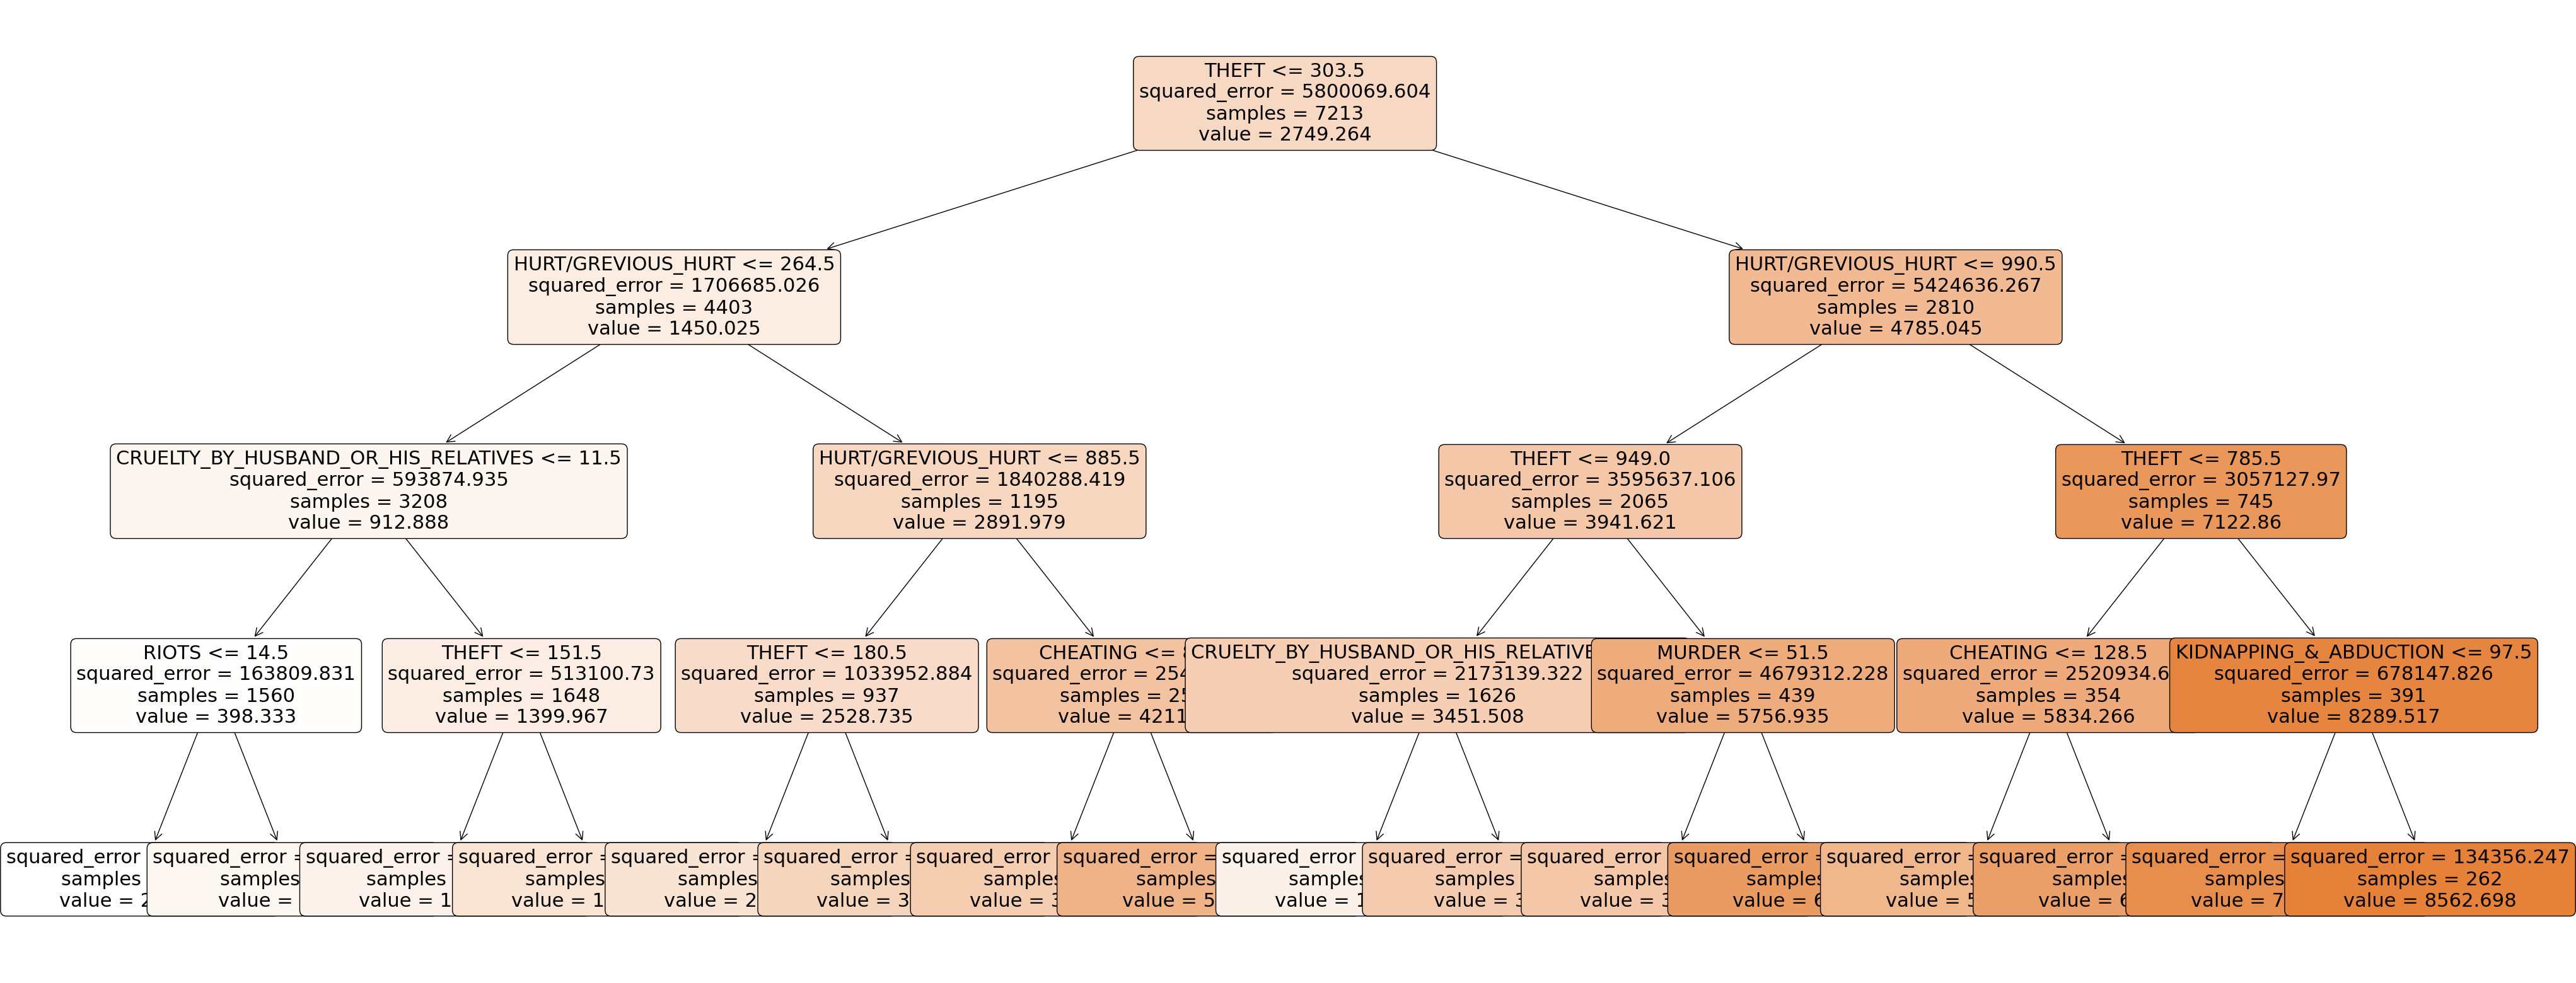

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert Index object to a list
feature_names_list = list(X.columns)

# Plot the decision tree
plt.figure(figsize=(50, 20))  # Adjust the figure size if needed
plot_tree(dt, feature_names=feature_names_list, filled=True, rounded=True,fontsize=22)
plt.show()


In [30]:
train_predictions = dt.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("Root Mean Squared Error on Training Set:", train_rmse)

Root Mean Squared Error on Training Set: 966.9623062634143


In [38]:
train_predictions = dt.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Root Mean Squared Error on Training Set:", test_rmse)

Root Mean Squared Error on Training Set: 998.4239358921658


In [68]:
import numpy as np

# Transform the target variable (house prices) using natural logarithm
y_train_log = np.log1p(y_train)

# Train the decision tree model on the transformed target variable
dt.fit(X_train, y_train_log)

# Predict on the test set
test_predictions_log = dt.predict(X_test)

# Exponentiate the predictions to bring them back to the original scale
test_predictions = np.expm1(test_predictions_log)

# Calculate RMSE on the original scale (after taking logarithm)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Root Mean Squared Error on Test Set (after taking logarithm):", test_rmse)


Root Mean Squared Error on Test Set (after taking logarithm): 4.537580429858825


In [69]:
import numpy as np

# Transform the target variable (house prices) using natural logarithm
y_train_log = np.log1p(y_train)

# Train the decision tree model on the transformed target variable
dt.fit(X_train, y_train_log)

# Predict on the training set
train_predictions_log = dt.predict(X_train)

# Exponentiate the predictions to bring them back to the original scale
train_predictions = np.expm1(train_predictions_log)

# Calculate RMSE on the original scale (after taking logarithm)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
print("Root Mean Squared Error on Training Set (after taking logarithm):", train_rmse)


Root Mean Squared Error on Training Set (after taking logarithm): 2.9174825904449406


# Random Forest

In [39]:
 from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestRegressor(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="squared_error",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=25, random_state=20)

### Selecting important feature 

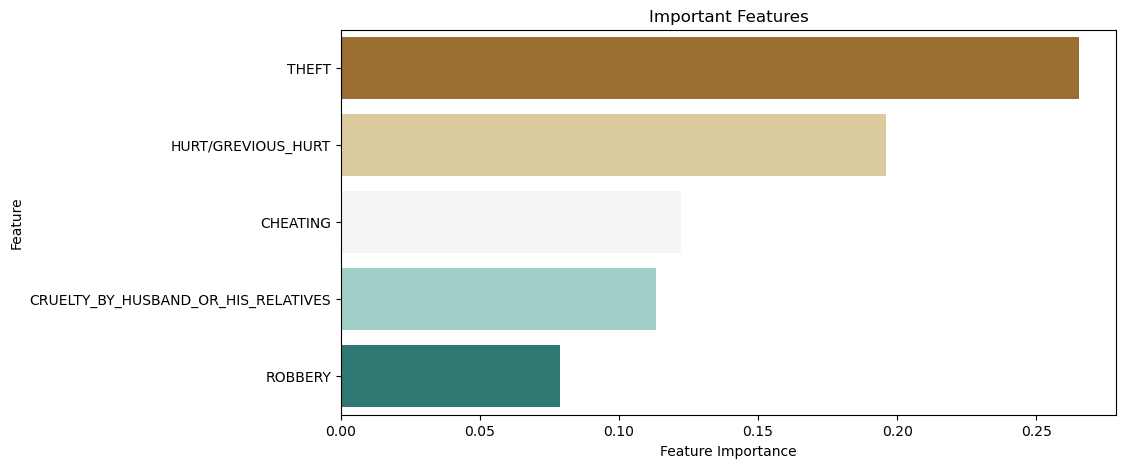

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances and feature names
imp = pd.Series(Model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.title("Important Features")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


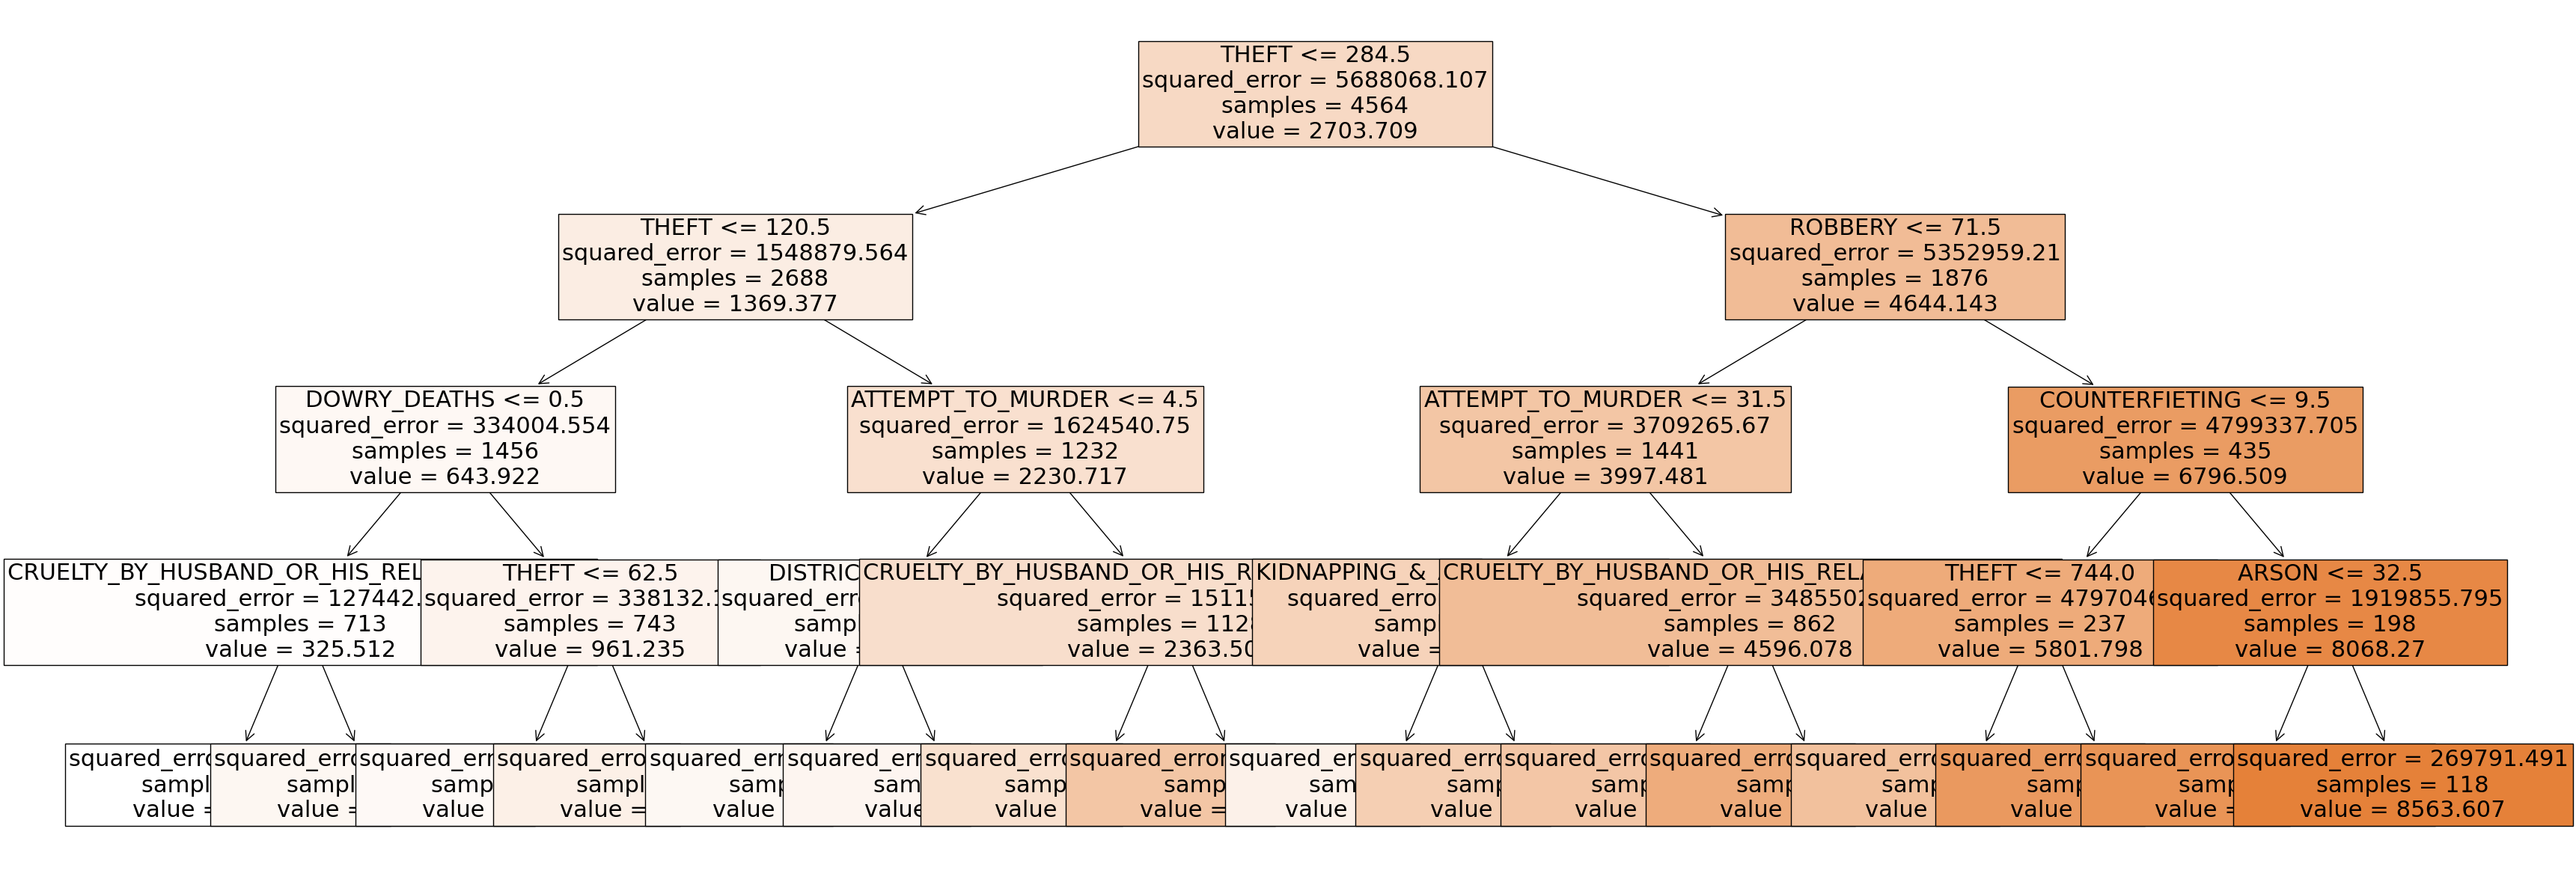

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names_list = X.columns.tolist()

# Assuming Model_rf is your trained Random Forest model
# Extracting one of the decision trees from the forest
estimator = Model_rf.estimators_[0]  # Change the index to visualize different trees

# Plotting the decision tree
plt.figure(figsize=(40, 15))
tree.plot_tree(estimator, filled=True, feature_names=feature_names_list, class_names=None,fontsize=22)
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming Model_rf is your trained Random Forest model and X_test, y_test are your test data
predictions = Model_rf.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("R-squared (R2):", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


R-squared (R2): 0.8741193786199634
Mean Absolute Error: 614.8596005087701
Mean Squared Error: 770330.992854232


In [43]:
from sklearn.metrics import r2_score

# Assuming Model_rf is your trained Random Forest model and X_test, y_test are your test data
predictions = Model_rf.predict(X_train)

# Calculate R-squared (R2)
r2 = r2_score(y_train, predictions)

print("R-squared (R2):", r2)


R-squared (R2): 0.8727434528027788


In [44]:
from sklearn.metrics import r2_score

# Assuming Model_rf is your trained Random Forest model and X_test, y_test are your test data
predictions = Model_rf.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

print("R-squared (R2):", r2)

R-squared (R2): 0.8741193786199634


In [48]:
train_predictions = Model_rf.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("Root Mean Squared Error on Training Set:", train_rmse)

Root Mean Squared Error on Training Set: 859.1256201920717


In [52]:
test_predictions = Model_rf.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Root Mean Squared Error on Training Set:", test_rmse)

Root Mean Squared Error on Training Set: 877.6850191579164


# using logarithm

In [60]:
model_rf = RandomForestRegressor(random_state=42)  # Create a Random Forest regressor
model_rf.fit(X_train, y_train_log)  # Fit the model to the transformed target variable

# Make predictions on the test set
test_predictions_log = model_rf.predict(X_test)  # Make predictions on the test set

# Exponentiate the predictions to bring them back to the original scale
test_predictions = np.expm1(test_predictions_log)  # Reverse the logarithm transformation

# Calculate RMSE on the original scale
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))  # Calculate RMSE
print("Root Mean Squared Error on Test Set (after taking logarithm):", test_rmse)

Root Mean Squared Error on Test Set (after taking logarithm): 3.0085443812565202


In [64]:
# Predict on the training set
train_predictions_log = model_rf.predict(X_train)

# Exponentiate the predictions to bring them back to the original scale
train_predictions = np.expm1(train_predictions_log)

# Calculate RMSE on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("Root Mean Squared Error on Training Set (after taking logarithm):", train_rmse)


Root Mean Squared Error on Training Set (after taking logarithm): 1.4026575638849033
